# Capstone Project

# Group_2 - Seventh Sense

# Social Media Analytics

# Source:
https://aiplanet.com/challenges/46/cascade-cup-data-science-hackathon/overview/about

# Problem Overview:
Understanding the customers’ intentions can help to improve the journey, e.g., by taking shortcuts or giving recommendations to improve the overall experience is very important. With the extent of development in the field of machine learning research, personalization of services has become very common. Typically, a user’s intention on a Web site can be understood by looking at their past interactions. In concrete terms, this means that a user leaves a sequence of events about the history of his page views and interactions. An event can be that a user makes a search query, calls up an article page or receives an e-mail. This data forms the basis for working with the following techniques. Therefore, the first step is to collect or extract this data. This step has been done by Trell.

In this world of big data, Trell wants you to use the data to predict the age group of their users based on their activity on social media activities.  This will help them to divide their huge userbase and cater differently to each of them. Given this huge dataset, predict the age group of the users, the evaluation metric for the competition is the Weighted F1 score.

The Machine learning model you develop will help Trell provide better experience to their users by giving them a better user age specific content which people might find more relatable

Analyzing User Behavior to Investigate Age Group Impact on Video Engagement to promote ads/campaigns


# Data Description

The dataset includes the following variables:
userId : Unique number given to each user   

tier : Tier of the city in which the user is residing

gender : Categorical feature representing the gender of the user. 1 represents male and 2 represents female

following_rate : Number of accounts followed by the user(feature is normalized)

followers_avg_age : Average of age groups of all the followers of the user

following_avg_age : Average of age groups of all the accounts followed by the user

max_repetitive_punc : Maximum repetitive punctuations found in the bio and comments of the user

num_of_hashtags_per_action : Average number of hashtags used by the user per comment

emoji_count_per_action : Average number of emojis used by the user per comment

punctuations_per_action : Average number of punctuations used by the user per comment

number_of_words_per_action : Average number of words used by the user per comment

avgCompletion : Average watch time completion rate of the videos

avgTimeSpent : Average time spent by the user on a video in seconds

avgDuration : Average duration of the videos that the user has watched till date

avgComments : Average number of comments per video watched

creations : Total number of videos uploaded by the user

content_views : Total number of videos watched

num_of_comments : Total number of comments made by the user(normalized)

weekends_trails_watched_per_day : Number of videos watched on weekends per day

weekdays_trails_watched_per_day : Number of videos watched on weekdays per day 

slot1_trails_watched_per_day : The day is divided into 4 slots. This feature represents the average number of videos watched in this particular time slot

slot2_trails_watched_per_day : The day is divided into 4 slots. This feature represents the average number of videos watched in this particular time slot

slot3_trails_watched_per_day : The day is divided into 4 slots. This feature represents the average number of videos watched in this particular time slot

slot4_trails_watched_per_day : The day is divided into 4 slots. This feature represents the average number of videos watched in this particular time slot

avgt2 : Average number of followers of all the accounts followed by the user

age_group : This is a categorical feature denoting the age of the user. Age of users is divided into 4 groups, 
1: <18y; 2: 18-24y; 3: 24-30y; 4: >30y

# Importing Libraries

In [167]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


from sklearn.model_selection import StratifiedShuffleSplit,train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import PowerTransformer

plt.tight_layout()

from warnings import filterwarnings
filterwarnings('ignore')

plt.style.use('fivethirtyeight')

<Figure size 432x288 with 0 Axes>

# Reading the dataset

In [168]:
df = pd.read_csv('train_age_dataset.csv')
df.head(25)

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,265153,48958844,2,1,0.000000,0.000000,0.000000,0,0.0,0.0,...,0.200000,0.000000,0.041667,0.025000,0.000000,0.000000,0.175000,0.033333,0.000000,1
1,405231,51100441,2,2,0.000000,0.000000,0.000000,0,0.0,0.0,...,0.093220,0.000000,0.012712,0.018644,0.000000,0.084746,0.000000,0.033898,82.500000,2
2,57867,6887426,2,1,0.000000,0.000000,0.000000,0,0.0,0.0,...,0.002786,0.000000,0.000000,0.000557,0.000000,0.002786,0.000000,0.000000,0.000000,1
3,272618,50742404,2,1,0.000000,0.000000,0.000000,0,0.0,0.0,...,0.008403,0.000000,0.000000,0.001681,0.000000,0.000000,0.000000,0.008403,0.000000,1
4,251123,45589200,2,2,0.000000,0.000000,0.000000,0,0.0,0.0,...,0.204918,0.000000,0.000000,0.049180,0.000000,0.008197,0.057377,0.180328,0.000000,1
5,229892,41104551,2,1,0.000000,0.000000,0.000000,0,0.0,0.0,...,0.072581,0.000000,0.080645,0.000000,0.000000,0.000000,0.000000,0.161290,0.000000,1
6,18167,32824244,1,1,0.000000,0.000000,0.000000,0,0.0,0.0,...,0.078740,0.000000,0.000000,0.015748,0.070866,0.000000,0.007874,0.000000,128.200000,1
7,18705,33815341,1,2,0.000000,0.000000,0.000000,0,0.0,0.0,...,0.047244,0.000000,0.031496,0.000000,0.000000,0.062992,0.000000,0.000000,184.781250,3
8,498266,7900978,2,1,0.013245,0.000000,0.000000,0,0.0,0.0,...,1.096026,0.000000,0.000000,0.215232,0.195364,0.149007,0.125828,0.605960,155.562500,4
9,310459,58074903,2,1,0.000000,0.000000,0.000000,0,0.0,0.0,...,0.067961,0.000000,0.009709,0.009709,0.000000,0.038835,0.009709,0.019417,0.000000,1


# Understanding number of entries and attributes

In [169]:
df.shape

(488877, 27)

# Looking into the attributes of the dataframe

In [170]:
df.columns

Index(['Unnamed: 0', 'userId', 'tier', 'gender', 'following_rate',
       'followers_avg_age', 'following_avg_age', 'max_repetitive_punc',
       'num_of_hashtags_per_action', 'emoji_count_per_action',
       'punctuations_per_action', 'number_of_words_per_action',
       'avgCompletion', 'avgTimeSpent', 'avgDuration', 'avgComments',
       'creations', 'content_views', 'num_of_comments',
       'weekends_trails_watched_per_day', 'weekdays_trails_watched_per_day',
       'slot1_trails_watched_per_day', 'slot2_trails_watched_per_day',
       'slot3_trails_watched_per_day', 'slot4_trails_watched_per_day', 'avgt2',
       'age_group'],
      dtype='object')

# Dropping unneccassary columns

In [171]:
df.drop(['Unnamed: 0','userId'],axis=1,inplace = True)
df.columns

Index(['tier', 'gender', 'following_rate', 'followers_avg_age',
       'following_avg_age', 'max_repetitive_punc',
       'num_of_hashtags_per_action', 'emoji_count_per_action',
       'punctuations_per_action', 'number_of_words_per_action',
       'avgCompletion', 'avgTimeSpent', 'avgDuration', 'avgComments',
       'creations', 'content_views', 'num_of_comments',
       'weekends_trails_watched_per_day', 'weekdays_trails_watched_per_day',
       'slot1_trails_watched_per_day', 'slot2_trails_watched_per_day',
       'slot3_trails_watched_per_day', 'slot4_trails_watched_per_day', 'avgt2',
       'age_group'],
      dtype='object')

# Understanding the DataType of each columns

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488877 entries, 0 to 488876
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   tier                             488877 non-null  int64  
 1   gender                           488877 non-null  int64  
 2   following_rate                   488877 non-null  float64
 3   followers_avg_age                488877 non-null  float64
 4   following_avg_age                488877 non-null  float64
 5   max_repetitive_punc              488877 non-null  int64  
 6   num_of_hashtags_per_action       488877 non-null  float64
 7   emoji_count_per_action           488877 non-null  float64
 8   punctuations_per_action          488877 non-null  float64
 9   number_of_words_per_action       488877 non-null  float64
 10  avgCompletion                    488877 non-null  float64
 11  avgTimeSpent                     488877 non-null  float64
 12  av

Here Gender and Tier are Categorical variables but are encoded and are in the data type int64.

Also we have followers_avg_age, following_avg_age which are categorical columns with continous values. 

Finally we have our target column age_group which is also a categorical column.

# Merging(Feature engineering) to distinguish classes

### a) Independent variables

To convert them to proper categorical values we bin them to 

* Class - 0 - No followers,No age group - binning range = (0)

* Class - 1 - < 18 years                - binning range = (>0 to 1.5)

* Class - 2 - 18-24 years               - binning range = (1.5 to 2.5)

* Class - 3 - 24-30 years               - binning range = (2.5 to 3.5)

* Class - 4 - >30 years                 - binning range = (>3.5)

In [173]:
df.loc[(df['followers_avg_age']>0)  & (df['followers_avg_age']<1.5),'followers_avg_age']=1
df.loc[(df['followers_avg_age']>=1.5) & (df['followers_avg_age']<2.5),'followers_avg_age']=2
df.loc[(df['followers_avg_age']>=2.5) & (df['followers_avg_age']<3.5),'followers_avg_age']=3
df.loc[(df['followers_avg_age']>=3.5),'followers_avg_age']=4

In [174]:
df.loc[(df['following_avg_age']>0)  & (df['following_avg_age']<1.5),'following_avg_age']=1
df.loc[(df['following_avg_age']>=1.5) & (df['following_avg_age']<2.5),'following_avg_age']=2
df.loc[(df['following_avg_age']>=2.5) & (df['following_avg_age']<3.5),'following_avg_age']=3
df.loc[(df['following_avg_age']>=3.5),'following_avg_age']=4

### b) Dependent variable

Now we have 4 classes in our dependent variable. 

In [175]:
df['age_group'].value_counts()

1    308315
4     60803
3     60404
2     59355
Name: age_group, dtype: int64

# Summary Statistics for categorical values and numerical values

### a) Categorical - summary statistics

In [176]:
df['gender']= df['gender'].astype(object)
df['tier']= df['tier'].astype(object)
df['followers_avg_age']= df['followers_avg_age'].astype(object)
df['following_avg_age']= df['followers_avg_age'].astype(object)
df['age_group']= df['age_group'].astype(object)

In [177]:
df.describe(exclude=np.number)

,tier,gender,followers_avg_age,following_avg_age,age_group
count,488877,488877,488877.0,488877.0,488877
unique,3,2,5.0,5.0,4
top,2,1,0.0,0.0,1
freq,397890,384728,406543.0,406543.0,308315


Here the attributes Tier,followers_avg_age,following_avg_age have 3 different classes
and the attributes gender,age_group have 2 different classes

We can see the data is only slightly imbalanced for the target column which is acceptable

### a) Numerical - summary statistics

In [178]:
df.describe()

,following_rate,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2
count,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,4.888770e+05,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000
mean,0.082233,0.739748,0.000277,0.000981,0.012805,0.179148,0.341582,1.087395e+02,83.104654,0.320923,0.017065,0.391013,0.002009,0.074353,0.066927,0.032855,0.141705,0.150401,0.158382,164.765782
std,2.467781,3.075954,0.012221,0.020381,0.159553,0.647588,0.195441,5.537516e+04,76.779586,7.649827,0.180402,0.905303,0.030561,0.211094,0.174791,0.193962,0.402612,0.451999,0.502065,981.988886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000653,1.000000e+00,0.233000,0.000000,0.000000,0.000887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.199675,5.655172e+00,30.724000,0.000000,0.000000,0.040650,0.000000,0.000000,0.002265,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.329743,8.500000e+00,62.501164,0.000000,0.000000,0.124031,0.000000,0.003968,0.015873,0.000000,0.011834,0.014563,0.015873,0.000000
75%,0.008621,0.000000,0.000000,0.000000,0.000000,0.150183,0.460492,1.308654e+01,112.246500,0.000000,0.009091,0.364486,0.000000,0.060000,0.059016,0.000000,0.117188,0.118644,0.122396,178.666667
max,895.304000,624.000000,2.333333,3.000000,27.333333,262.666667,1.000000,3.826604e+07,7541.026000,3228.000000,63.388889,75.662281,8.196850,17.201754,18.756140,19.612903,27.905983,45.083333,55.153846,39304.000000


# Checking for Null values/Missing values, negative values detection, outlier detection

### a) Null values/Missing values

In [179]:
df.isnull().sum()

tier                               0
gender                             0
following_rate                     0
followers_avg_age                  0
following_avg_age                  0
max_repetitive_punc                0
num_of_hashtags_per_action         0
emoji_count_per_action             0
punctuations_per_action            0
number_of_words_per_action         0
avgCompletion                      0
avgTimeSpent                       0
avgDuration                        0
avgComments                        0
creations                          0
content_views                      0
num_of_comments                    0
weekends_trails_watched_per_day    0
weekdays_trails_watched_per_day    0
slot1_trails_watched_per_day       0
slot2_trails_watched_per_day       0
slot3_trails_watched_per_day       0
slot4_trails_watched_per_day       0
avgt2                              0
age_group                          0
dtype: int64

As we can see we do not have any null values/missing values

### b) Negative value detection

Checking if any of the attributes has any negative values which might be missing values since all the attributes we have are count of some unit

In [180]:
negative_cols = df.columns[(df < 0).any()]

print("Columns with negative values:", list(negative_cols))

Columns with negative values: []


There are no columns with negative values.

### c) Outlier detection

Here we check for outliers only for target column. 

Since the target column is categorical we check if any of the classes is represented very less by checking the balance of the data.

Total rows: 488877
1    308315
4     60803
3     60404
2     59355
Name: age_group, dtype: int64


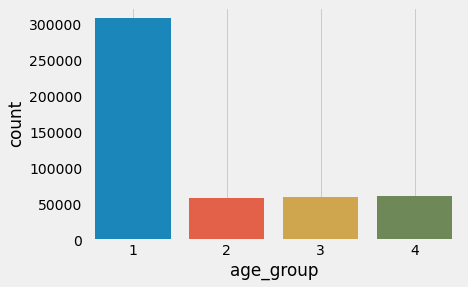

In [181]:
print('Total rows:', df['age_group'].value_counts().sum())
print(df['age_group'].value_counts())
sns.countplot(df['age_group'])
plt.grid()
plt.show()

# Statistical Analysis

### i) Two sample t-test(one tail test)

Null Hypothesis      (Ho): Average number of followers for female >= Average number of followers for male

Alternate Hypothesis (Ha): Average number of followers for female < Average number of followers for male    

In [182]:
import pandas as pd
from scipy.stats import ttest_ind

# Create separate dataframes for males and females
male_df = df[df['gender'] == 1]
female_df = df[df['gender'] == 2]

# Calculate the mean number of followers for each data frame
male_mean = male_df['following_rate'].mean()
female_mean = female_df['following_rate'].mean()

# Perform the one-tailed t-test
t_stat, p_value = ttest_ind(male_df['following_rate'], female_df['following_rate'], alternative='greater')

# Print the results
print('Male mean:', male_mean)
print('Female mean:', female_mean)
print('t-statistic:', t_stat)
print('p-value:', p_value)

Male mean: 0.09087721339931046
Female mean: 0.05030148136620538
t-statistic: 4.707319950416057
p-value: 1.2553171309784035e-06


We have sig_val as 0.05

Pval = 0

Pval<Sig_val

Null Hypothesis is rejected.

Average number of followers for female<Average number of followers for male

# Univariate analysis, Bivariate analysis

## a) Univariate analysis

### i)  Numerical columns

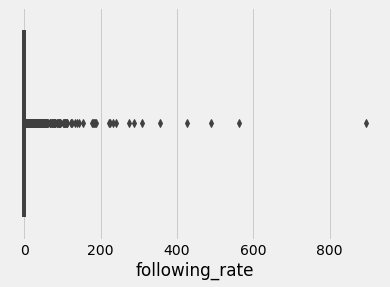

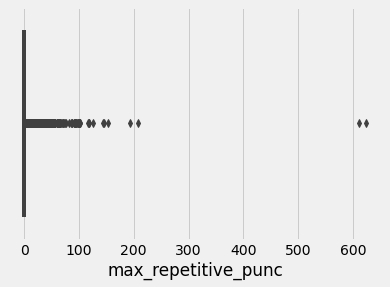

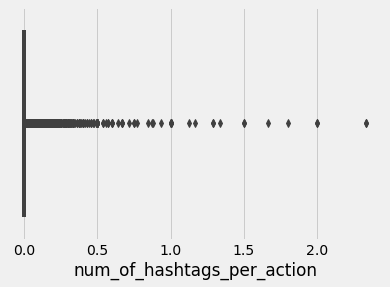

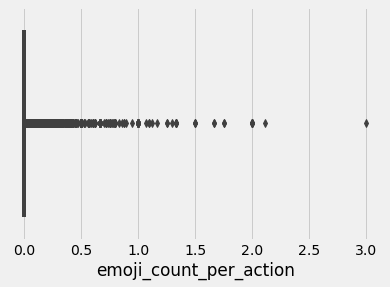

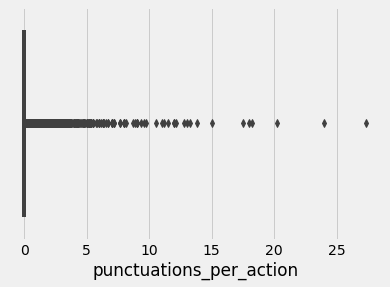

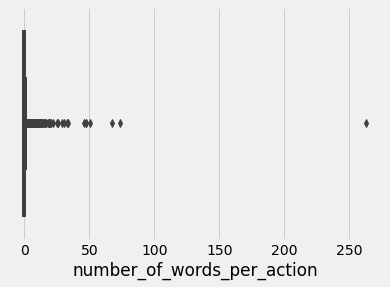

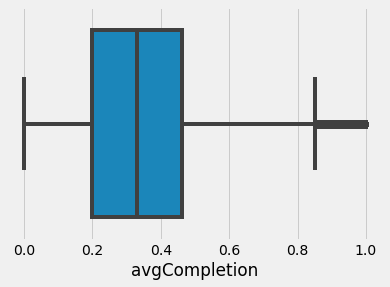

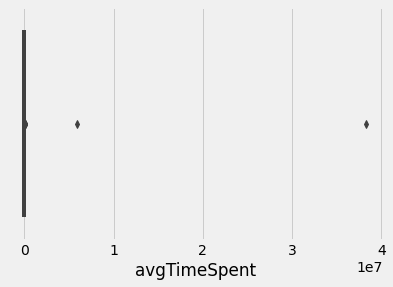

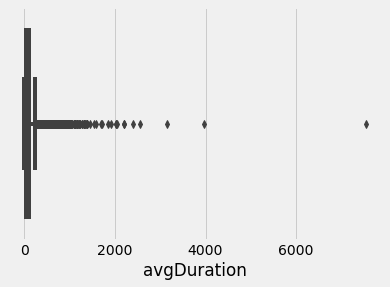

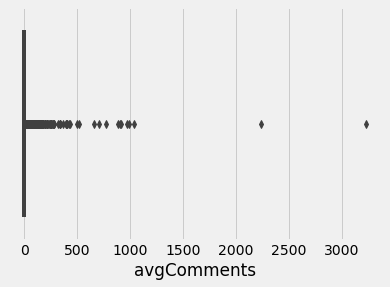

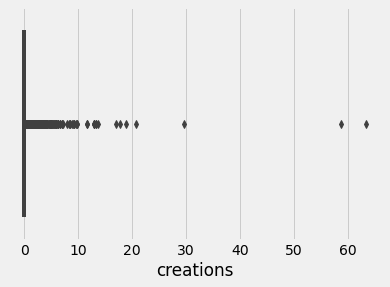

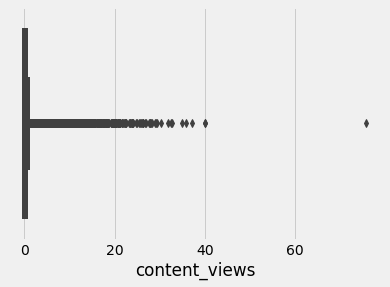

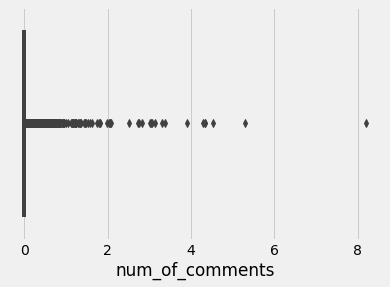

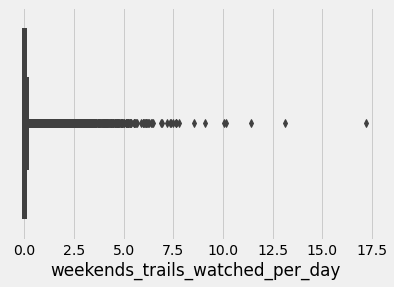

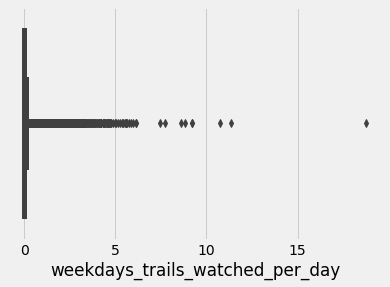

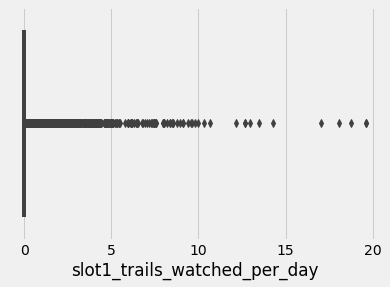

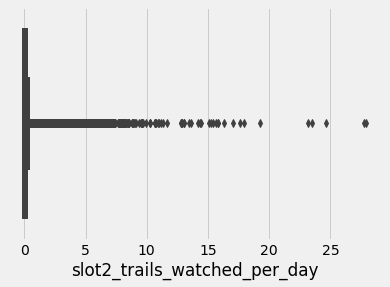

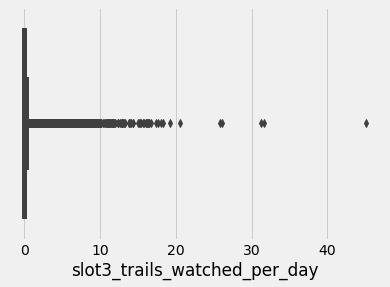

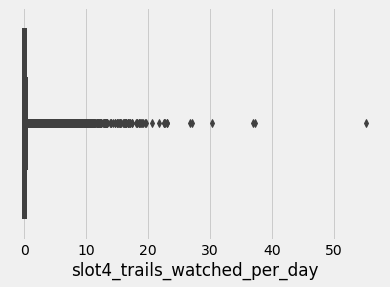

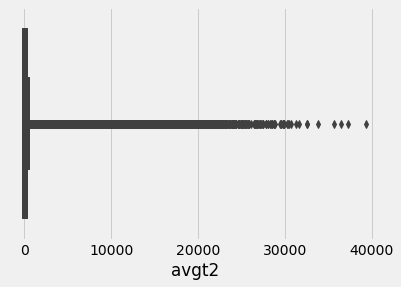

In [183]:
numerical_columns = df.select_dtypes(include='number').columns.tolist()
for i in numerical_columns:
    sns.boxplot(df[i])
    plt.show()

Based on the above box plot we can see lot of values are distributed in and around 0. We had a doubt if these 0's are missing values or they are of 0 units. Based on the observation we found out that these 0's are not missing values rather they are actually 0 units for the respective attribue.

Skew of following_rate is 182.22068170430606


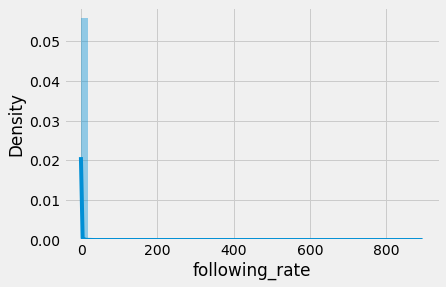

Skew of max_repetitive_punc is 41.83043406593152


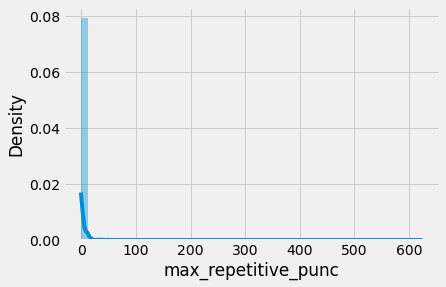

Skew of num_of_hashtags_per_action is 98.28234754873498


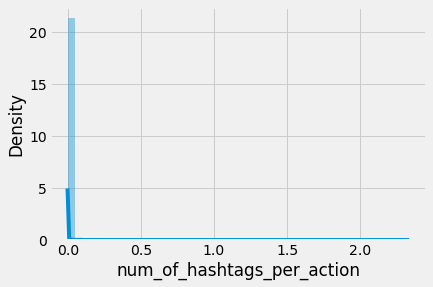

Skew of emoji_count_per_action is 49.421971095038415


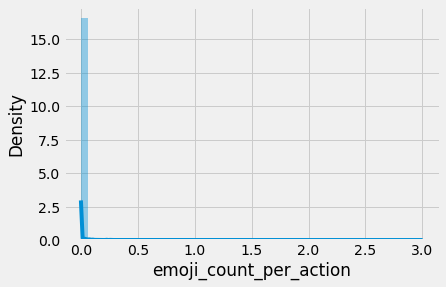

Skew of punctuations_per_action is 56.131696406007286


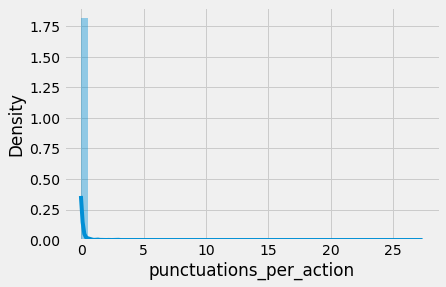

Skew of number_of_words_per_action is 149.17317419836996


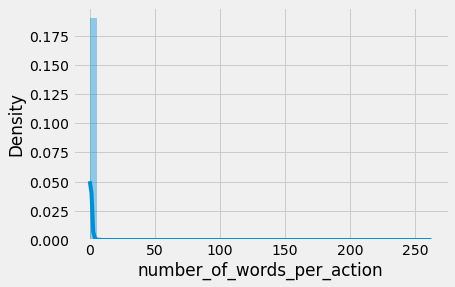

Skew of avgCompletion is 0.6232190512179687


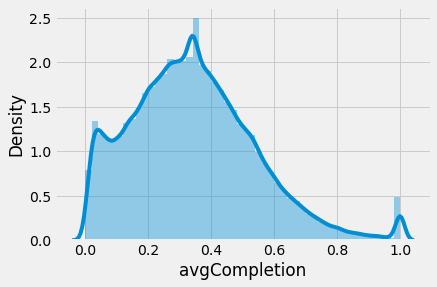

Skew of avgTimeSpent is 677.4582650541395


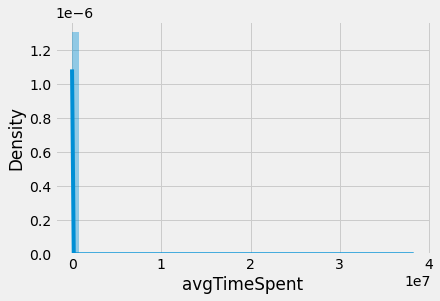

Skew of avgDuration is 5.300169702911687


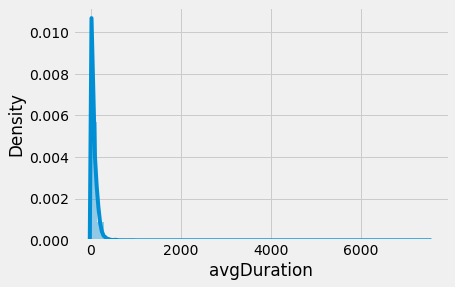

Skew of avgComments is 239.80280523162628


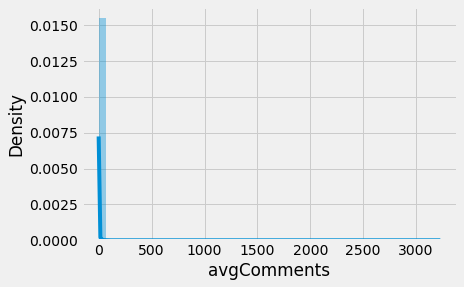

Skew of creations is 189.9986437381193


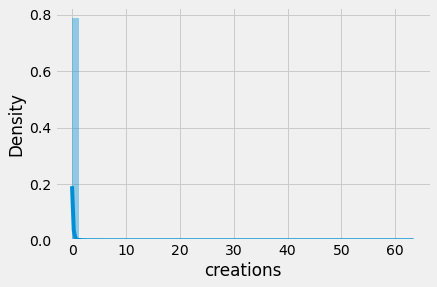

Skew of content_views is 9.84945889835024


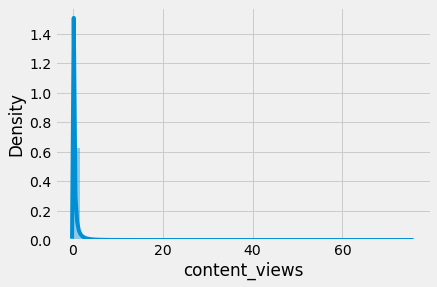

Skew of num_of_comments is 109.57069475423617


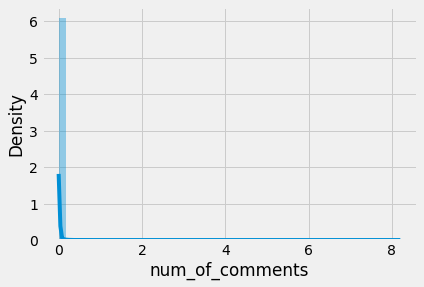

Skew of weekends_trails_watched_per_day is 10.635756727483146


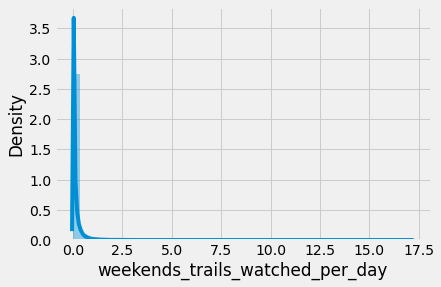

Skew of weekdays_trails_watched_per_day is 12.721963212877544


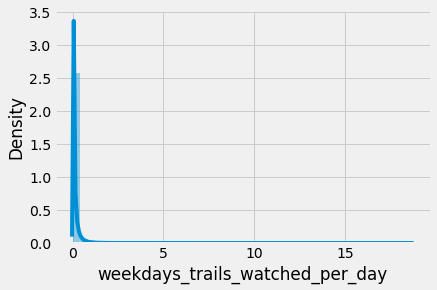

Skew of slot1_trails_watched_per_day is 26.33731942023952


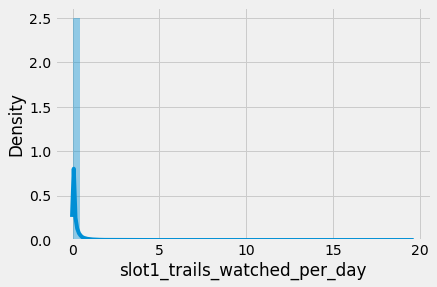

Skew of slot2_trails_watched_per_day is 11.380346932098185


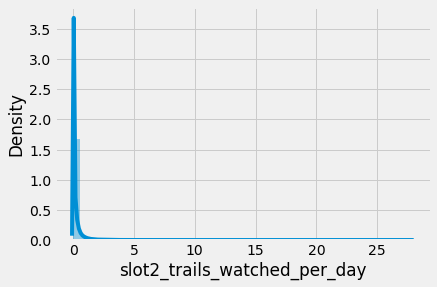

Skew of slot3_trails_watched_per_day is 13.531890958438156


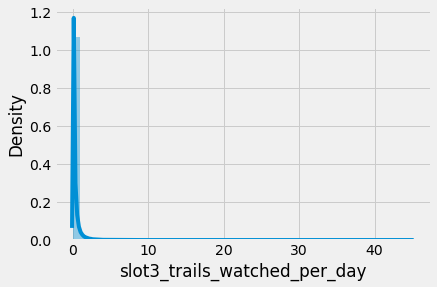

Skew of slot4_trails_watched_per_day is 16.179045104594138


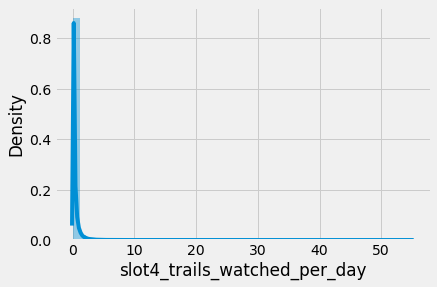

Skew of avgt2 is 17.015246420774936


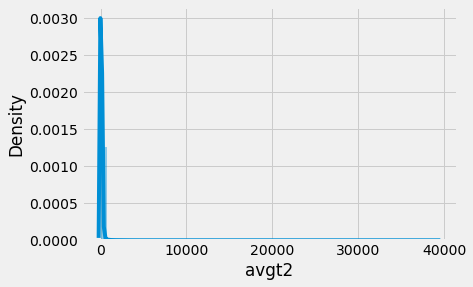

In [184]:
for i in numerical_columns:
    print('Skew of', i, 'is', df[i].skew())
    sns.distplot(df[i])
    plt.show()

As we can see there is a lot of skew in most of the attributes so we have to perform transformation for sure to reduce the impact of outliers.

### ii) Categorical columns

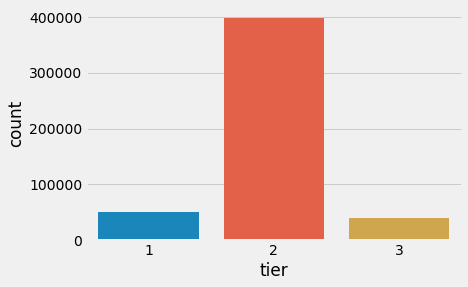

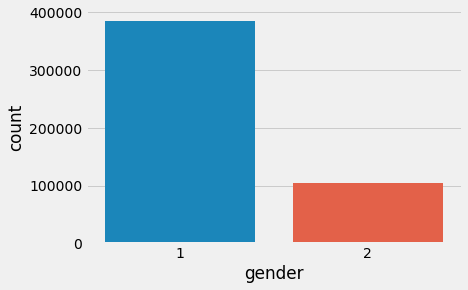

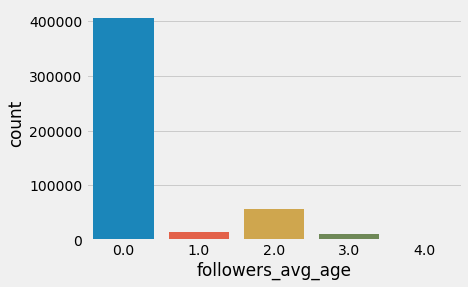

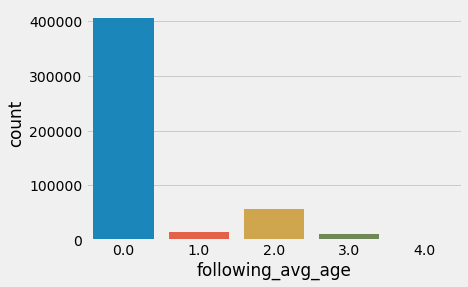

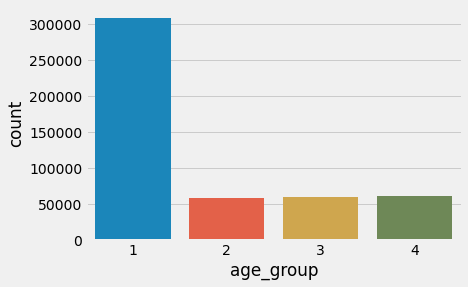

In [185]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()
for i in categorical_columns:
    sns.countplot(df[i])
    plt.show()

As we can see here for the target column the data is defined well for both the classes.

For the columns followers_avg_age, following_avg_age class 4 is represented very less which means users having followers of age_group> 30 is of very less number.

Similary since there are lot of users do not have any followers the average age of people following them or average age of people followed by the user is 0 represented by Class-0

We can infer a lot of people from tier 2 are using Trell.

Based on gender we can infer most of the users are males and very less female users for the given data.

# b) Bivariate analysis

### i) Numerical vs Numerical

In [186]:
df.corr() 

,following_rate,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2
following_rate,1.000000,0.042046,-0.000267,-0.000094,0.000437,0.013535,-0.001991,-0.000041,0.002808,0.048721,0.068423,0.068105,0.097322,0.069426,0.078755,0.037387,0.067126,0.066273,0.067535,0.000386
max_repetitive_punc,0.042046,1.000000,0.013202,0.036628,0.107544,0.113900,0.017007,0.001450,0.014316,0.085199,0.128265,0.104363,0.134459,0.124927,0.132210,0.076631,0.109411,0.117538,0.112034,0.015238
num_of_hashtags_per_action,-0.000267,0.013202,1.000000,0.082216,0.246677,0.063917,-0.000569,-0.000027,0.006848,0.000051,0.000220,-0.007262,-0.000665,-0.005060,-0.006013,-0.002130,-0.005646,-0.005094,-0.004785,0.005928
emoji_count_per_action,-0.000094,0.036628,0.082216,1.000000,0.268548,0.091448,0.006767,-0.000078,0.000940,-0.000731,-0.000131,-0.014948,-0.001184,-0.010307,-0.012633,-0.004726,-0.011646,-0.010229,-0.010284,0.000373
punctuations_per_action,0.000437,0.107544,0.246677,0.268548,1.000000,0.178658,0.006133,-0.000129,0.012055,-0.000375,0.000455,-0.025064,-0.001434,-0.017546,-0.020994,-0.007591,-0.019514,-0.017457,-0.017003,0.006542
number_of_words_per_action,0.013535,0.113900,0.063917,0.091448,0.178658,1.000000,-0.005436,0.000413,0.096247,0.084435,0.090804,-0.051387,0.105880,-0.023800,-0.028933,-0.000539,-0.032751,-0.022979,-0.023218,0.112689
avgCompletion,-0.001991,0.017007,-0.000569,0.006767,0.006133,-0.005436,1.000000,-0.001637,-0.500401,-0.001890,-0.006728,0.120575,0.005225,0.113727,0.099520,0.029638,0.101512,0.098102,0.087699,-0.003243
avgTimeSpent,-0.000041,0.001450,-0.000027,-0.000078,-0.000129,0.000413,-0.001637,1.000000,0.001697,0.000128,-0.000058,-0.000350,-0.000045,-0.000224,-0.000294,-0.000273,-0.000172,-0.000061,-0.000402,0.002329
avgDuration,0.002808,0.014316,0.006848,0.000940,0.012055,0.096247,-0.500401,0.001697,1.000000,0.017395,0.014330,-0.101929,0.011659,-0.086671,-0.074600,-0.024947,-0.079746,-0.069297,-0.066767,0.070710
avgComments,0.048721,0.085199,0.000051,-0.000731,-0.000375,0.084435,-0.001890,0.000128,0.017395,1.000000,0.060626,0.079880,0.761904,0.084036,0.099023,0.060284,0.073781,0.089031,0.080429,0.011173


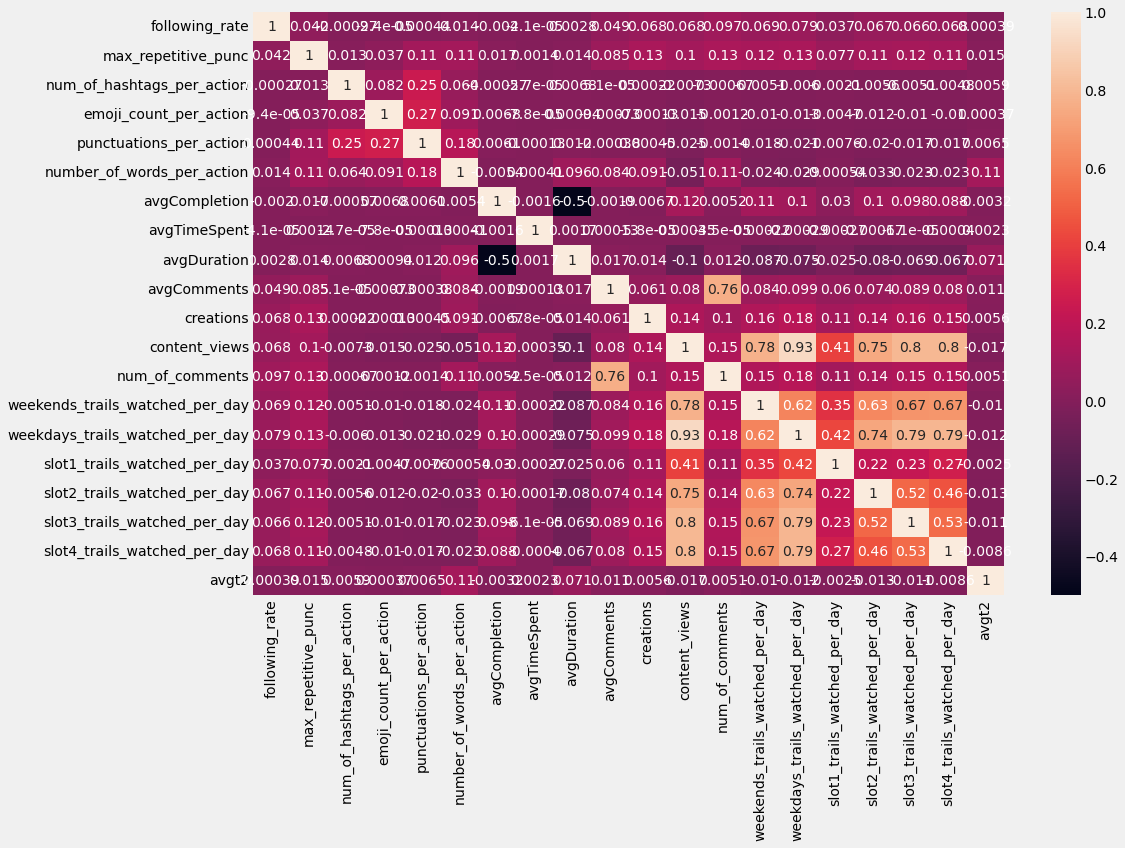

In [187]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

Based on the observation we can see most of the columns have very less correlation with each other. So we can expect less multicollinearity in the dataset.

Here we can see avg_duration of video is negatively correlated to avg_completion. This tells us users are interested in completing shorter videos rather than wathcing long videos. This might be the reason Instagram  reels, Youtube shorts and such similar features are famous.

The features content_views and weekdays_trials_watched_per_day are highly correlated.

##### Followers_avg_age vs  Follwing_rate

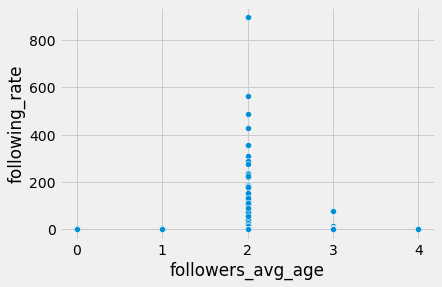

In [188]:
sns.scatterplot(y=df['following_rate'],x=df['followers_avg_age'])
plt.show()

##### Following_avg_age vs Following_rate

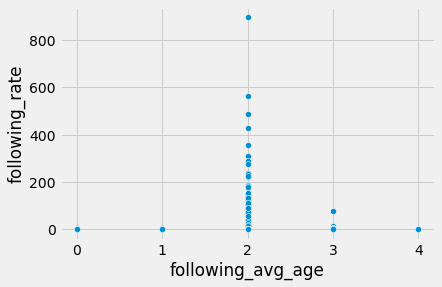

In [189]:
sns.scatterplot(y=df['following_rate'],x=df['following_avg_age'])
plt.show()

Based on the above two graphs we have a doubt. When the number of followers = 0 the average followers_age and following_age should be on Class 0 but we have datapoints on Class 1(<18) ,Class 2(>=18) which is illogical.

In [190]:
df[((df['followers_avg_age']==1)|(df['followers_avg_age']==2)|(df['followers_avg_age']==3)|(df['followers_avg_age']==4)) & (df['following_rate']==0 )]

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group


In [191]:
df[((df['following_avg_age']==1)|(df['following_avg_age']==2)|(df['following_avg_age']==3)|(df['following_avg_age']==4)) & (df['following_rate']==0 )]

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group


Based on above analysis we understand that there are No users who have 0 followers but have average following_age or followers_age in Class 1 or Class 2. They might be values very close to 0.

### ii)Categorical  vs  Numerical 

##### Target  vs Numerical 

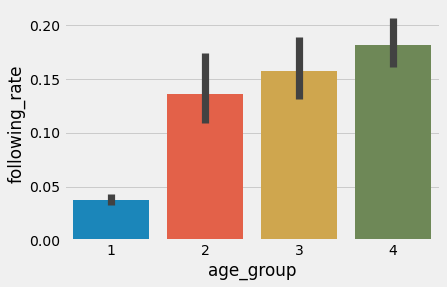

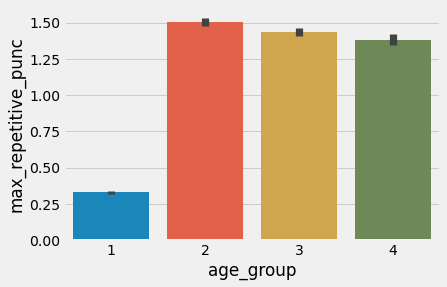

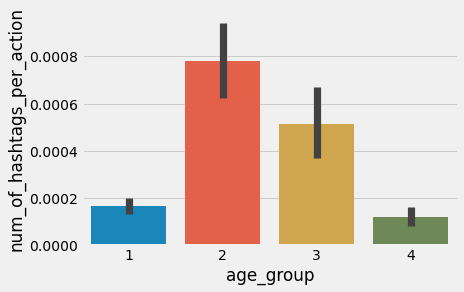

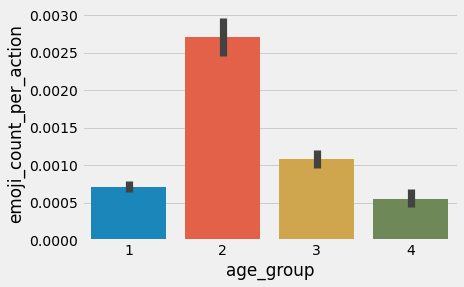

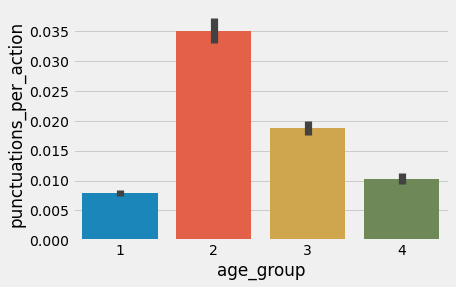

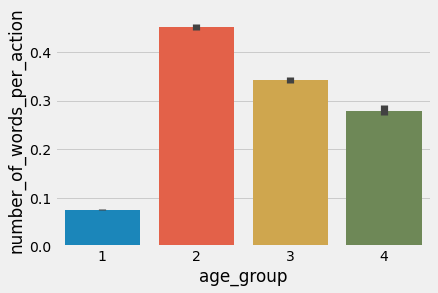

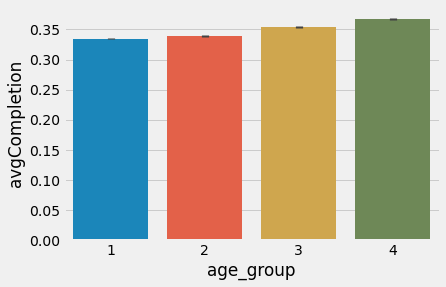

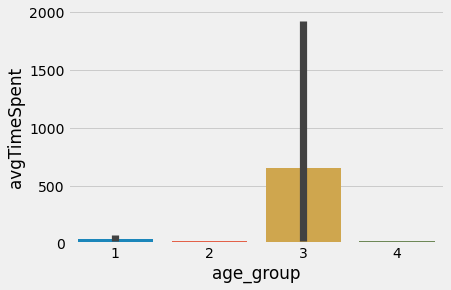

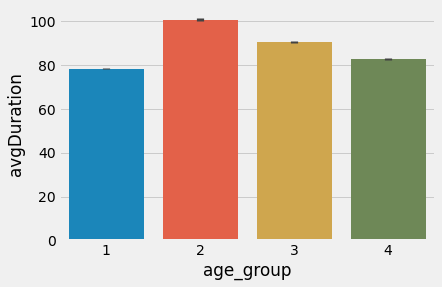

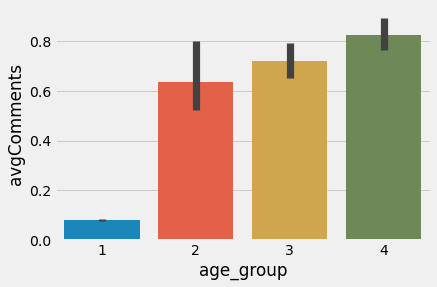

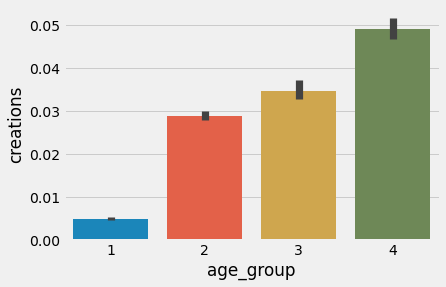

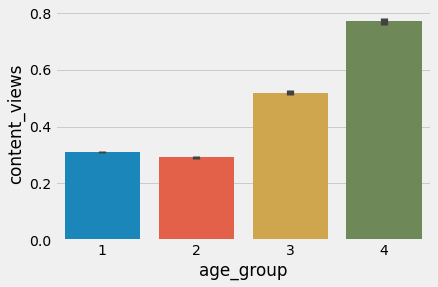

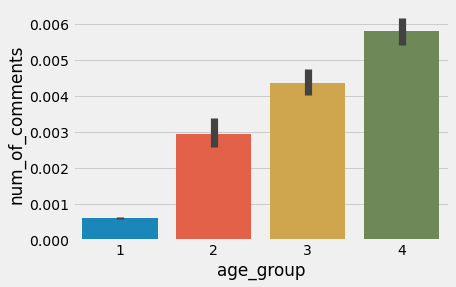

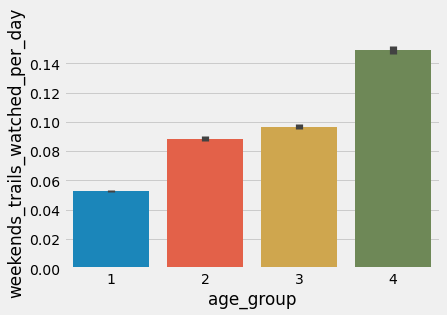

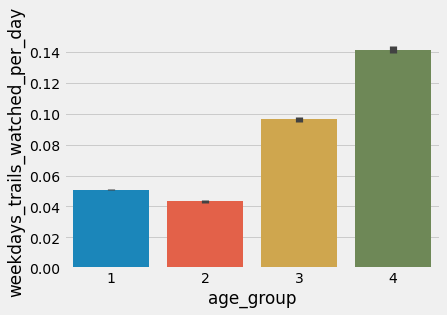

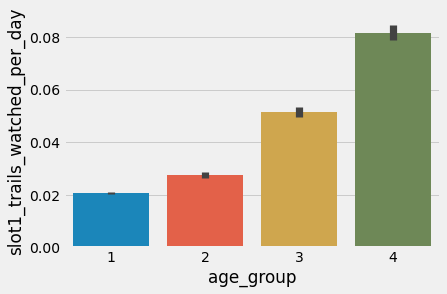

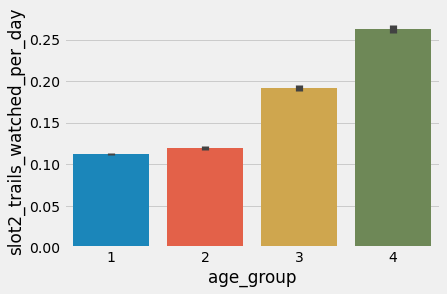

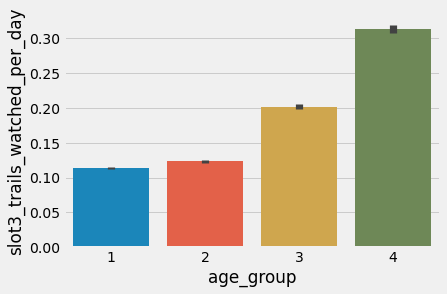

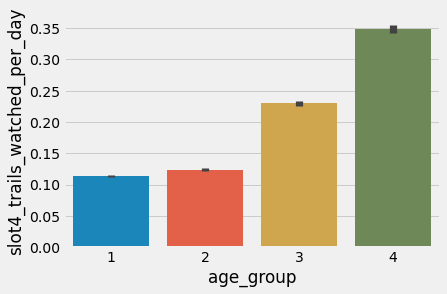

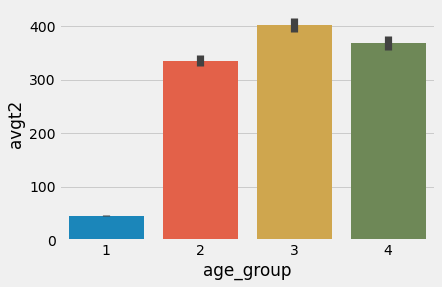

In [192]:
for i in numerical_columns:
    sns.barplot(y=df[i],x=df['age_group'])
    plt.show()

##### Gender vs Following_rate(Number of followers)

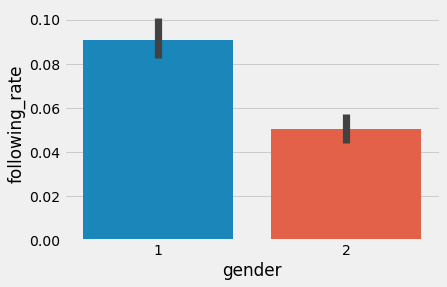

In [193]:
sns.barplot(x=df['gender'],y=df['following_rate'])
plt.show()

As we can see males have more number of followers than female.

### iii) Categorical vs Categorical

##### Target  vs Categorical 

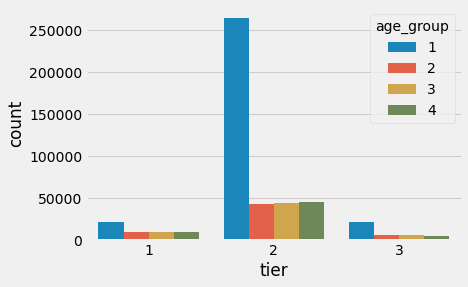

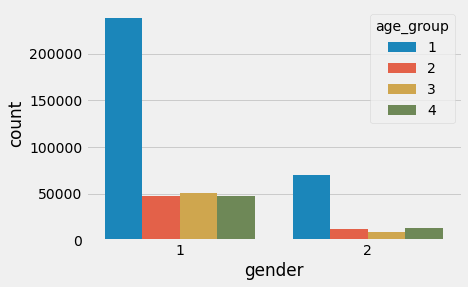

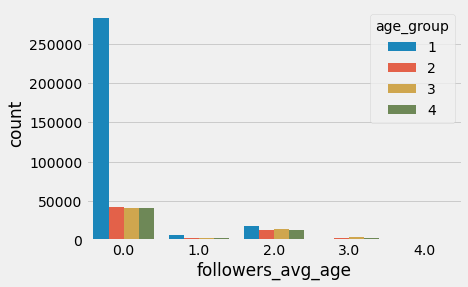

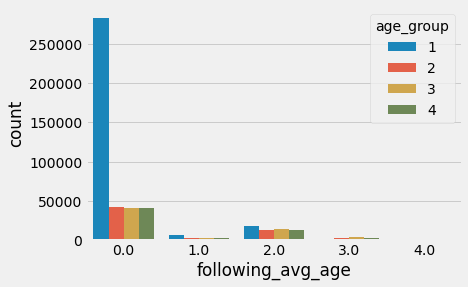

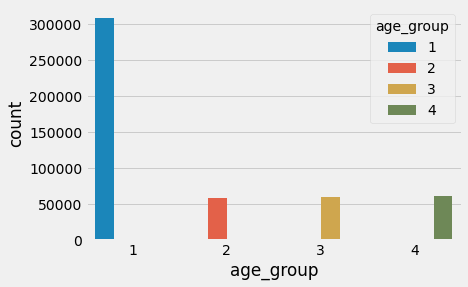

In [194]:
for i in categorical_columns:
    sns.countplot(df[i],hue=df['age_group'])
    plt.show()

1) Tier vs Age_group - In general we have more users who are of age less than 18 but in tier 1 we can see there are lot of users who are above 18 years than below 18 years.

2)Gender vs Age_group - we might see theres same amount of variation in both the age_groups in terms of gender i.e. Proportion of Age_group >18:<18 is equal in both genders

3) As we can see here there might be lot of new users since they dont have any followers because of which the average_age is also 0.
Also we can see there are people who are < 18 have more followers > 18 and users who are > 18 also have followers who are > 18.
This tells us that people who are >18 follow people irrespective of age.

4)Similarly we can see there are people who are < 18 are following more users > 18 and users who are > 18 are also following more users who are > 18. It might give us an insight that users > 18 are probably more interested in socialising than users < 18.

##### Gender vs Tier

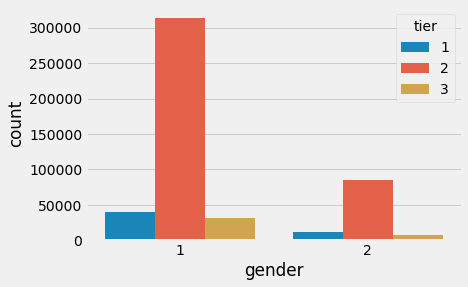

In [195]:
sns.countplot(df['gender'],hue=df['tier'])
plt.show()

We can infer that there are almost number male, female users from Tier 1 and Tier 3.

# Seperating into numerical and categorical columns

In [196]:
X = df.drop('age_group',axis=1)
y = df[['age_group']]

In [197]:
X_num = X[['following_rate','max_repetitive_punc',
                         'num_of_hashtags_per_action','emoji_count_per_action','punctuations_per_action',
                         'number_of_words_per_action','avgCompletion','avgTimeSpent','avgDuration','avgComments',
                         'creations','content_views','num_of_comments','weekends_trails_watched_per_day',
                         'weekdays_trails_watched_per_day','slot1_trails_watched_per_day','slot2_trails_watched_per_day',
                         'slot3_trails_watched_per_day','slot4_trails_watched_per_day','avgt2']]
X_cat = X[['tier','gender','followers_avg_age','following_avg_age']]

# Transforming the data

## a)Before transformation

In [198]:
X_num.skew()

following_rate                     182.220682
max_repetitive_punc                 41.830434
num_of_hashtags_per_action          98.282348
emoji_count_per_action              49.421971
punctuations_per_action             56.131696
number_of_words_per_action         149.173174
avgCompletion                        0.623219
avgTimeSpent                       677.458265
avgDuration                          5.300170
avgComments                        239.802805
creations                          189.998644
content_views                        9.849459
num_of_comments                    109.570695
weekends_trails_watched_per_day     10.635757
weekdays_trails_watched_per_day     12.721963
slot1_trails_watched_per_day        26.337319
slot2_trails_watched_per_day        11.380347
slot3_trails_watched_per_day        13.531891
slot4_trails_watched_per_day        16.179045
avgt2                               17.015246
dtype: float64

As we can see we have high value of skew for most of the columns. So we apply yeo-johnson transofmation technique to make sure thedata is normalised as much as possible. The reason we apply yeo-johnsosn is that there are 0s. So yeo-johnson will be the best method of transformation in such a scenario and box-cox will not work.

# a)After transformation

In [199]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df_transformed = pd.DataFrame(pt.fit_transform(X_num),columns=X_num.columns)
df_transformed.head()

,following_rate,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2
0,-0.56388,-0.40533,-0.047542,-0.09579,-0.236055,-0.776454,0.706346,1.590452,-0.115168,-0.315439,-0.778126,0.167954,-0.312494,0.379936,-0.095068,-0.426731,-0.808674,1.135155,-0.243816,-0.960928
1,-0.56388,-0.40533,-0.047542,-0.09579,4.452601,0.832302,0.549739,0.765045,0.556993,-0.315439,0.291138,-0.465714,-0.312494,-0.344578,-0.288406,-0.426731,0.463154,-0.811190,-0.235308,0.766087
2,-0.56388,-0.40533,-0.047542,-0.09579,-0.236055,-0.776454,0.114690,1.166561,0.383057,-0.315439,-0.778126,-1.243705,-0.312494,-0.761099,-0.943946,-0.426731,-0.751783,-0.811190,-0.815891,-0.960928
3,-0.56388,-0.40533,-0.047542,-0.09579,-0.236055,-0.776454,-2.081049,-1.573908,2.678449,-0.315439,-0.778126,-1.186735,-0.312494,-0.761099,-0.898119,-0.426731,-0.808674,-0.811190,-0.657700,-0.960928
4,-0.56388,-0.40533,-0.047542,-0.09579,-0.236055,-0.776454,0.675446,0.505945,-0.120018,-0.315439,-0.778126,0.191739,-0.312494,-0.761099,0.502245,-0.426731,-0.644898,0.117462,1.127126,-0.960928


The skew is high for 'num_of_hashtags_per_action' even after transformation. For class 1 these many class 2 these many....
This tells us many people are not using hashtags

In [200]:
df_transformed.skew()

following_rate                      1.733886
max_repetitive_punc                 2.061848
num_of_hashtags_per_action         20.990729
emoji_count_per_action             10.349309
punctuations_per_action             4.068353
number_of_words_per_action          0.882614
avgCompletion                       0.010438
avgTimeSpent                       -0.077770
avgDuration                        -0.010749
avgComments                         2.854754
creations                           1.087440
content_views                       0.553165
num_of_comments                     2.928127
weekends_trails_watched_per_day     0.989292
weekdays_trails_watched_per_day     0.839751
slot1_trails_watched_per_day        2.126087
slot2_trails_watched_per_day        0.890366
slot3_trails_watched_per_day        0.901285
slot4_trails_watched_per_day        0.896502
avgt2                               0.123972
dtype: float64

# Encoding the data

As we can see our categorical columns are already encoded we did not have to perform any encoding. Only thing we have to do hewre is to convert these category clolumns from object datatype to integer datatype

In [201]:
X_cat['gender']= X_cat['gender'].astype(np.number)
X_cat['tier']= X_cat['tier'].astype(np.number)
X_cat['followers_avg_age']= X_cat['followers_avg_age'].astype(np.number)
X_cat['following_avg_age']= X_cat['followers_avg_age'].astype(np.number)
y['age_group']= y['age_group'].astype(int)

# Combining Numerical and Categorical as one dataframe

In [202]:
df_feature = pd.concat([df_transformed,X_cat],axis=1)

In [203]:
df_feature.head(1)

,following_rate,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,...,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,tier,gender,followers_avg_age,following_avg_age
0,-0.56388,-0.40533,-0.047542,-0.09579,-0.236055,-0.776454,0.706346,1.590452,-0.115168,-0.315439,...,-0.095068,-0.426731,-0.808674,1.135155,-0.243816,-0.960928,2.0,1.0,0.0,0.0


## Train Test Split

In [204]:
xtrain,xtest,ytrain,ytest = train_test_split(df_feature,y,test_size=0.2,random_state=100)

In [205]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(391101, 24)
(97776, 24)
(391101, 1)
(97776, 1)


In [206]:
train_data = pd.concat([xtrain,ytrain],axis=1)

In [207]:
train_data['age_group'].value_counts()

1    246700
4     48584
3     48341
2     47476
Name: age_group, dtype: int64

#### Now to reduce the impact of imbalance in the data we perform Stratified Shuffle split.

In [208]:
train_data1 = train_data[train_data['age_group']==1]
train_data2 = train_data[train_data['age_group']==2]
train_data3 = train_data[train_data['age_group']==3]
train_data4 = train_data[train_data['age_group']==4]

In [209]:
# create samples of class 1 empty

group1_sample1 = None
group1_sample2 = None
group1_sample3 = None

sss=StratifiedShuffleSplit(n_splits=1,test_size=0.33,random_state=10)
for train_index , test_index in sss.split(train_data1,train_data1['age_group']):
    group1_sample1 = train_data1.iloc[test_index]
    group1_sample1_remaining = train_data1.iloc[train_index]

In [210]:
group1_sample1.shape

(81411, 25)

In [211]:
group1_sample1_remaining.shape

(165289, 25)

In [212]:
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.5,random_state=10)
for train_index , test_index in sss.split(group1_sample1_remaining,group1_sample1_remaining['age_group']):
    group1_sample2 = group1_sample1_remaining.iloc[test_index]
    group1_sample3 = group1_sample1_remaining.iloc[train_index]

In [213]:
group1_sample2.shape

(82645, 25)

In [214]:
group1_sample3.shape

(82644, 25)

## Sample 1

In [215]:
df_1 = pd.concat([group1_sample1,train_data2,train_data3,train_data4])

In [216]:
df1_final = df_1.sample(frac=1).reset_index(drop=True)
df1_final['age_group'].value_counts()

1    81411
4    48584
3    48341
2    47476
Name: age_group, dtype: int64

## Sample 2

In [217]:
df_2 = pd.concat([group1_sample2,train_data2,train_data3,train_data4])

In [218]:
df2_final = df_2.sample(frac=1).reset_index(drop=True)
df2_final['age_group'].value_counts()

1    82645
4    48584
3    48341
2    47476
Name: age_group, dtype: int64

## Sample 3

In [219]:
df_3 = pd.concat([group1_sample3,train_data2,train_data3,train_data4])

In [220]:
df3_final = df_3.sample(frac=1).reset_index(drop=True)
df3_final['age_group'].value_counts()

1    82644
4    48584
3    48341
2    47476
Name: age_group, dtype: int64

In [221]:
x1 = df1_final.drop('age_group',axis=1)
y1 = df1_final['age_group']

In [222]:
x2 = df2_final.drop('age_group',axis=1)
y2 = df2_final['age_group']

In [223]:
x3 = df3_final.drop('age_group',axis=1)
y3 = df3_final['age_group']

# Model Building

## Decision tree without undersampling

In [224]:
dt = DecisionTreeClassifier(criterion='gini',random_state = 10)
dt.fit(xtrain,ytrain)
y_pred_base = dt.predict(xtest)
y_pred_base_train = dt.predict(xtrain)

In [225]:
f1_score(ytest,y_pred_base,average= 'weighted')

0.6928659313469843

In [226]:
print(classification_report(ytrain,y_pred_base_train))
print(classification_report(ytest,y_pred_base))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00    246700
           2       1.00      1.00      1.00     47476
           3       1.00      1.00      1.00     48341
           4       1.00      1.00      1.00     48584

    accuracy                           1.00    391101
   macro avg       1.00      1.00      1.00    391101
weighted avg       1.00      1.00      1.00    391101

              precision    recall  f1-score   support

           1       0.88      0.88      0.88     61615
           2       0.42      0.42      0.42     11879
           3       0.35      0.35      0.35     12063
           4       0.35      0.35      0.35     12219

    accuracy                           0.69     97776
   macro avg       0.50      0.50      0.50     97776
weighted avg       0.69      0.69      0.69     97776



As we can see the model is overfitting and most importantly Class 1 is predicted well. So we proceed with ensembling methods to generalise the model and predict equally for all the classes.

## Voting Classifier

In [227]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [228]:
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = GaussianNB()

# Create an ensemble of models using a voting classifier
voting_ensemble = VotingClassifier(estimators=[('dt', model1), ('lr', model2), ('nb', model3)], voting='hard')

In [229]:
voting_ensemble.fit(x1,y1)
# Make predictions on the test set using the ensemble model
y_pred_voting = voting_ensemble.predict(xtest)

In [230]:
f1_score(ytest,y_pred_voting,average='weighted')

0.6746534104860061

* Voting Classifier is not working out

## Logistic Regression - Base Model

In [231]:
from sklearn.linear_model import LogisticRegression

### 1st sample

In [232]:
lr = LogisticRegression(random_state = 10)
lr.fit(x1,y1)
y_pred1 = lr.predict(xtest)
y_pred_train = lr.predict(x1)

In [233]:
f1_score(ytest,y_pred1,average= 'weighted')

0.6960263355569551

### 2nd sample

In [234]:
lr = LogisticRegression(random_state = 10)
lr.fit(x2,y2)
y_pred2 = lr.predict(xtest)
y_pred_train = lr.predict(x2)

In [235]:
f1_score(ytest,y_pred2,average= 'weighted')

0.6959819176581605

### 3rd sample

In [236]:
lr = LogisticRegression(random_state = 10)
lr.fit(x3,y3)
y_pred3 = lr.predict(xtest)
y_pred_train = lr.predict(x3)

In [237]:
f1_score(ytest,y_pred3,average= 'weighted')

0.6959144358986286

## Advanced Model building

## Decision Tree

### For 1st sample

In [238]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini',random_state = 10)
dt.fit(x1,y1)
y_pred1 = dt.predict(xtest)
y_pred_train = dt.predict(x1)

In [239]:
from sklearn.metrics import classification_report
print(classification_report(y1,y_pred_train))
print(classification_report(ytest,y_pred1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     81411
           2       1.00      1.00      1.00     47476
           3       1.00      1.00      1.00     48341
           4       1.00      1.00      1.00     48584

    accuracy                           1.00    225812
   macro avg       1.00      1.00      1.00    225812
weighted avg       1.00      1.00      1.00    225812

              precision    recall  f1-score   support

           1       0.94      0.84      0.89     61615
           2       0.40      0.47      0.43     11879
           3       0.34      0.40      0.36     12063
           4       0.34      0.40      0.37     12219

    accuracy                           0.69     97776
   macro avg       0.50      0.53      0.51     97776
weighted avg       0.73      0.69      0.70     97776



In [240]:
from sklearn.metrics import f1_score
f1_score(ytest,y_pred1,average= 'weighted')

0.7041084480964619

### For 2nd sample

In [241]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini',random_state = 10)
dt.fit(x2,y2)
y_pred2 = dt.predict(xtest)
y_pred_train = dt.predict(x2)

In [242]:
from sklearn.metrics import classification_report
print(classification_report(y2,y_pred_train))
print(classification_report(ytest,y_pred2))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     82645
           2       1.00      1.00      1.00     47476
           3       1.00      1.00      1.00     48341
           4       1.00      1.00      1.00     48584

    accuracy                           1.00    227046
   macro avg       1.00      1.00      1.00    227046
weighted avg       1.00      1.00      1.00    227046

              precision    recall  f1-score   support

           1       0.94      0.85      0.89     61615
           2       0.39      0.46      0.42     11879
           3       0.34      0.39      0.37     12063
           4       0.34      0.40      0.36     12219

    accuracy                           0.69     97776
   macro avg       0.50      0.52      0.51     97776
weighted avg       0.72      0.69      0.70     97776



In [243]:
from sklearn.metrics import f1_score
f1_score(ytest,y_pred2,average= 'weighted')

0.7027161172826492

### For 3rd sample

In [244]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini',random_state = 10)
dt.fit(x3,y3)
y_pred3 = dt.predict(xtest)
y_pred_train = dt.predict(x3)

In [245]:
from sklearn.metrics import classification_report
print(classification_report(y3,y_pred_train))
print(classification_report(ytest,y_pred3))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     82644
           2       1.00      1.00      1.00     47476
           3       1.00      1.00      1.00     48341
           4       1.00      1.00      1.00     48584

    accuracy                           1.00    227045
   macro avg       1.00      1.00      1.00    227045
weighted avg       1.00      1.00      1.00    227045

              precision    recall  f1-score   support

           1       0.94      0.85      0.89     61615
           2       0.40      0.46      0.43     11879
           3       0.34      0.39      0.36     12063
           4       0.34      0.40      0.37     12219

    accuracy                           0.69     97776
   macro avg       0.50      0.52      0.51     97776
weighted avg       0.72      0.69      0.70     97776



In [246]:
from sklearn.metrics import f1_score
f1_score(ytest,y_pred3,average= 'weighted')

0.7030984573891249

### Voting

In [247]:
ypred_decision = pd.concat([pd.Series(y_pred1),pd.Series(y_pred2),pd.Series(y_pred3)],axis=1)

In [248]:
ypred_decision['final'] = 0
ypred_decision.head(1)

,0,1,2,final
0,1,1,1,0


In [249]:
for i in range (ypred_decision.shape[0]):
    if (ypred_decision.iloc[i,0]==ypred_decision.iloc[i,1]==ypred_decision.iloc[i,2]):
        ypred_decision.loc[i,'final'] = ypred_decision.iloc[i,0]
    elif ((ypred_decision.iloc[i,0]==ypred_decision.iloc[i,1])|(ypred_decision.iloc[i,2]==ypred_decision.iloc[i,1])):
        ypred_decision.loc[i,'final'] = ypred_decision.iloc[i,1] 
    elif ((ypred_decision.iloc[i,0]==ypred_decision.iloc[i,2])):
        ypred_decision.loc[i,'final'] = ypred_decision.iloc[i,0]
    else :
        # if all the 3 models give different y_pred we consider the y_pred of model which has highest f1 score
        ypred_decision.loc[i,'final'] = ypred_decision.iloc[i,0]

In [250]:
f1_score(ytest,ypred_decision['final'],average='weighted')

0.7116790442354735

## RandomForest

### 1st sample

In [251]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50,criterion='entropy',random_state = 10)
rf.fit(x1,y1)
y_pred1 = rf.predict(xtest)
y_pred_train = rf.predict(x1)

In [252]:
f1_score(ytest,y_pred1,average= 'weighted')

0.7243346006894962

### 2nd sample

In [253]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50,criterion='entropy',random_state = 10)
rf.fit(x2,y2)
y_pred2 = rf.predict(xtest)
y_pred_train2 = rf.predict(x2)

In [254]:
from sklearn.metrics import f1_score
f1_score(ytest,y_pred2,average= 'weighted')

0.724380259375692

### 3rd sample

In [255]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50,criterion='entropy',random_state = 10)
rf.fit(x3,y3)
y_pred3 = rf.predict(xtest)
y_pred_train3 = rf.predict(x3)

In [256]:
from sklearn.metrics import f1_score
f1_score(ytest,y_pred3,average= 'weighted')

0.7265502670860321

In [257]:
from sklearn.metrics import classification_report
print(classification_report(y3,y_pred_train3))
print(classification_report(ytest,y_pred3))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     82644
           2       1.00      1.00      1.00     47476
           3       1.00      1.00      1.00     48341
           4       1.00      1.00      1.00     48584

    accuracy                           1.00    227045
   macro avg       1.00      1.00      1.00    227045
weighted avg       1.00      1.00      1.00    227045

              precision    recall  f1-score   support

           1       0.99      0.82      0.90     61615
           2       0.40      0.66      0.50     11879
           3       0.36      0.38      0.37     12063
           4       0.41      0.48      0.44     12219

    accuracy                           0.70     97776
   macro avg       0.54      0.59      0.55     97776
weighted avg       0.77      0.70      0.73     97776



### Voting

In [258]:
ypred_random = pd.concat([pd.Series(y_pred1),pd.Series(y_pred2),pd.Series(y_pred3)],axis=1)

In [259]:
ypred_random['final']=0
ypred_random.head(1)

,0,1,2,final
0,1,1,1,0


In [260]:
for i in range (ypred_random.shape[0]):
    if (ypred_random.iloc[i,0]==ypred_random.iloc[i,1]==ypred_random.iloc[i,2]):
        ypred_random.loc[i,'final'] = ypred_random.iloc[i,0]
    elif ((ypred_random.iloc[i,0]==ypred_random.iloc[i,1])|(ypred_random.iloc[i,2]==ypred_random.iloc[i,1])):
        ypred_random.loc[i,'final'] = ypred_random.iloc[i,1] 
    elif ((ypred_random.iloc[i,0]==ypred_random.iloc[i,2])):
        ypred_random.loc[i,'final'] = ypred_random.iloc[i,0]
    else :
        ypred_random.loc[i,'final'] = ypred_random.iloc[i,2]

In [261]:
f1_score(ytest,ypred_random['final'],average='weighted')

0.7274761222789584

In [262]:
# Combine the 3 sets of predictions into a single 2D array
ypred = np.array([y_pred1, y_pred2, y_pred3])

# Get the majority vote for each sample
majority_vote = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=ypred)

print("Majority vote for the 3 samples:", majority_vote)

Majority vote for the 3 samples: [1 3 1 ... 4 1 3]


In [263]:
f1_score(ytest,majority_vote,average='weighted')

0.7269986904176484

In [264]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier

# Gradient Boosting

### 1st sample

In [265]:
gbc = GradientBoostingClassifier(n_estimators=50,random_state = 10)
gbc.fit(x1,y1)
y_pred1 = gbc.predict(xtest)
y_pred_train = gbc.predict(x1)

In [266]:
f1_score(ytest,y_pred1,average= 'weighted')

0.7302053928979699

### 2nd sample

In [267]:
gbc = GradientBoostingClassifier(n_estimators=50,random_state = 10)
gbc.fit(x2,y2)
y_pred2 = gbc.predict(xtest)
y_pred_train = gbc.predict(x2)

In [268]:
f1_score(ytest,y_pred2,average= 'weighted')

0.7296223028712837

### 3rd sample

In [269]:
gbc = GradientBoostingClassifier(n_estimators=50,random_state = 10)
gbc.fit(x3,y3)
y_pred3 = gbc.predict(xtest)
y_pred_train = gbc.predict(x3)

In [270]:
f1_score(ytest,y_pred3,average = 'weighted')

0.7305046090299866

In [271]:
print(classification_report(y3,y_pred_train))
print(classification_report(ytest,y_pred3))

              precision    recall  f1-score   support

           1       1.00      0.81      0.89     82644
           2       0.49      0.70      0.57     47476
           3       0.47      0.42      0.44     48341
           4       0.49      0.49      0.49     48584

    accuracy                           0.64    227045
   macro avg       0.61      0.60      0.60    227045
weighted avg       0.67      0.64      0.64    227045

              precision    recall  f1-score   support

           1       1.00      0.81      0.89     61615
           2       0.40      0.69      0.51     11879
           3       0.39      0.41      0.40     12063
           4       0.41      0.49      0.45     12219

    accuracy                           0.71     97776
   macro avg       0.55      0.60      0.56     97776
weighted avg       0.78      0.71      0.73     97776



### Voting

In [272]:
ypred_gradient = pd.concat([pd.Series(y_pred1),pd.Series(y_pred2),pd.Series(y_pred3)],axis=1)

In [273]:
ypred_gradient['final']=0
ypred_gradient.head(1)

,0,1,2,final
0,1,1,1,0


In [274]:
for i in range (ypred_gradient.shape[0]):
    if (ypred_gradient.iloc[i,0]==ypred_gradient.iloc[i,1]==ypred_gradient.iloc[i,2]):
        ypred_gradient.loc[i,'final'] = ypred_gradient.iloc[i,0]
    elif ((ypred_gradient.iloc[i,0]==ypred_gradient.iloc[i,1])|(ypred_gradient.iloc[i,2]==ypred_gradient.iloc[i,1])):
        ypred_gradient.loc[i,'final'] = ypred_gradient.iloc[i,1] 
    elif ((ypred_gradient.iloc[i,0]==ypred_gradient.iloc[i,2])):
        ypred_gradient.loc[i,'final'] = ypred_gradient.iloc[i,0]
    else :
        ypred_gradient.loc[i,'final'] = ypred_gradient.iloc[i,2]

In [275]:
f1_score(ytest,ypred_gradient['final'],average='weighted')

0.730007389033497

In [276]:
from sklearn.ensemble import StackingClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier 

## Stacking Classifier

### 1st sample

In [277]:
model1 = RandomForestClassifier(n_estimators=50,random_state=10)
model2 = GradientBoostingClassifier(n_estimators=50,random_state = 10)
model3 = XGBClassifier(n_estimators=50,random_state=10)

# Create an ensemble of models using a voting classifier
stacking_ensemble = StackingClassifier(estimators=[('rf', model1), ('gb', model2), ('xg', model3)],final_estimator=model2)

stacking_ensemble.fit(x1,y1)
y_pred1 = stacking_ensemble.predict(xtest)

In [278]:
f1_score(ytest,y_pred1,average='weighted')

0.7516550407893867

### 2nd sample

In [281]:
model1 = RandomForestClassifier(n_estimators=50,random_state=10)
model2 = GradientBoostingClassifier(n_estimators=50,random_state = 10)
model3 = XGBClassifier(n_estimators=50,random_state=10)

# Create an ensemble of models using a voting classifier
stacking_ensemble = StackingClassifier(estimators=[('rf', model1), ('gb', model2), ('xg', model3)],final_estimator=model2)


stacking_ensemble.fit(x2,y2)
y_pred2 = stacking_ensemble.predict(xtest)

In [282]:
f1_score(ytest,y_pred2,average='weighted')

0.7519109770371948

### 3rd sample

In [283]:
model1 = RandomForestClassifier(n_estimators=50,random_state=10)
model2 = GradientBoostingClassifier(n_estimators=50,random_state = 10)
model3 = XGBClassifier(n_estimators=50,random_state=10)

# Create an ensemble of models using a voting classifier
stacking_ensemble = StackingClassifier(estimators=[('rf', model1), ('gb', model2), ('xg', model3)],final_estimator=model2)


stacking_ensemble.fit(x3,y3)
y_pred3 = stacking_ensemble.predict(xtest)

In [284]:
f1_score(ytest,y_pred3,average='weighted')

0.7509905044127734

### Voting

In [285]:
ypred_stacking = pd.concat([pd.Series(y_pred1),pd.Series(y_pred2),pd.Series(y_pred3)],axis=1)

In [286]:
ypred_stacking['final']=0
ypred_stacking.head(1)

,0,1,2,final
0,1,1,1,0


In [287]:
for i in range (ypred_stacking.shape[0]):
    if (ypred_stacking.iloc[i,0]==ypred_stacking.iloc[i,1]==ypred_stacking.iloc[i,2]):
        ypred_stacking.loc[i,'final'] = ypred_stacking.iloc[i,0]
    elif ((ypred_stacking.iloc[i,0]==ypred_stacking.iloc[i,1])|(ypred_stacking.iloc[i,2]==ypred_stacking.iloc[i,1])):
        ypred_stacking.loc[i,'final'] = ypred_stacking.iloc[i,1] 
    elif ((ypred_stacking.iloc[i,0]==ypred_stacking.iloc[i,2])):
        ypred_stacking.loc[i,'final'] = ypred_stacking.iloc[i,0]
    else :
        ypred_stacking.loc[i,'final'] = ypred_stacking.iloc[i,0]

In [288]:
f1_score(ytest,ypred_stacking['final'],average='weighted')

0.7518810432870682

In [291]:
print(classification_report(ytest,ypred_stacking['final']))

              precision    recall  f1-score   support

           1       0.99      0.83      0.91     61615
           2       0.43      0.76      0.55     11879
           3       0.44      0.52      0.48     12063
           4       0.49      0.42      0.45     12219

    accuracy                           0.73     97776
   macro avg       0.59      0.63      0.59     97776
weighted avg       0.79      0.73      0.75     97776



## Improvements to be made if there is no time constraint.

## Tuning parameters using gridsearch

### Gridsearch for Randomforest

### Gridsearch for GradientBoosting

### Gridsearch for XGBClassifier

* Finally stack them all using stacking classifier and take the voting to check the f1_score.